In [73]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os 
import sys
import argparse

In [ ]:
h = "Формат картинки"
parser.add_argument('-f', '--format', type=str, choices=('png', 'pdf', 'pgf'), help=h)
h = "Каталог для сохранения картинок"
parser.add_argument('-d', '--directory', type=str, default='img', help=h)

args = parser.parse_args()

# если задан формат картинки, то используем его
FMT = args.format if args.format else 'png'

FOLDER = args.directory + os.sep

In [22]:
# Before the import I've added by hand the row "mes" in the text. 
data = pd.read_csv("out.txt")

In [23]:
data[:5]

mes
0     0.11176
1     0.01574
2     0.01593
3     0.01554
4     0.01613

In [24]:
mes = data.to_numpy()

In [57]:
plt.rcParams.update({
    "font.serif": ['Times New Roman'],
    "font.sans-serif": ['Arial'],
    "font.family": 'serif',
    "font.size": "4",
    # не использовать настройки шрифтов самого matplotlib
    "pgf.rcfonts": False,
    "pgf.texsystem": 'xelatex',
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "axes.grid": True,
    "axes.grid.which": 'both',
    "grid.linewidth": 0.25,
    "grid.linestyle": 'dashed',
    "grid.color": 'gray',
})

In [74]:
std = np.std(mes)
avg = np.average(mes)

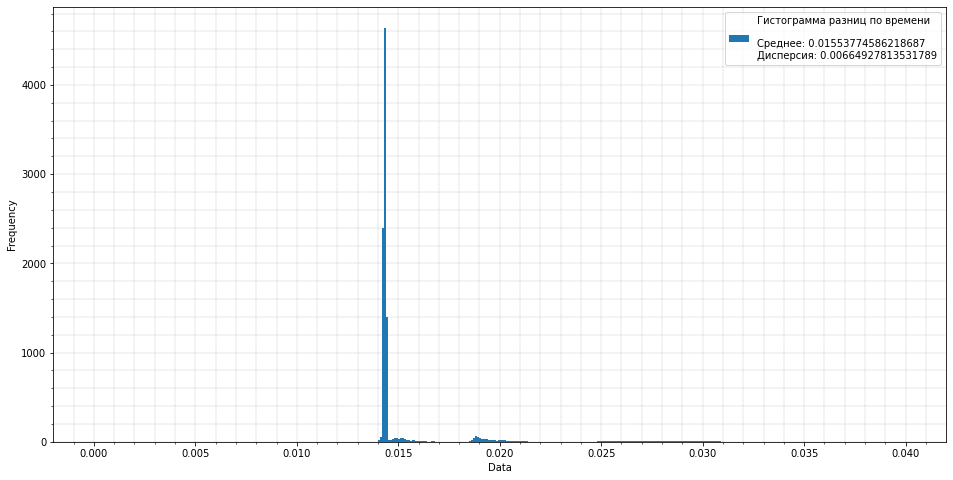

In [81]:
# Гистограмма разниц по времени. 
%matplotlib inline


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.hist(mes, density=True, bins=400, range=(0, 0.04), label=f"Гистограмма разниц по времени \n\nCреднее: {avg} \
\nДисперсия: {std}")
ax.set_ylabel('Frequency')
ax.set_xlabel('Data')
ax.legend(loc="best")

In [ ]:
print("сохраняем изображения")
# Если каталога нет, то создаем
if os.path.exists(FOLDER):
    print(f"{FOLDER} существует")
else:
    print(f"{FOLDER} не существует, создаем")
    os.makedirs(FOLDER)

params = dict(format=FMT, dpi=300, bbox_inches='tight', pad_inches=0.0)
ax.savefig(f"{FOLDER}diff.{FMT}", **params)